In [1]:
# Group Number: 9
# Roll Numbers : 18IE10037 | 19CS10031 | 19CS3001 
#Names of members: Jagriti Agarwal | Gandhi Abhishek Rajesh | Abhilash Datta
# Project Number: CADT
# Project Title: Car Insurance Approval using Decision Tree based Learning Model

In [2]:
!git clone https://github.com/abhigandhi29/ML_course.git
%cd ML_course/

c:\Users\ABHISHEK\Desktop\ml\ML_course
fatal: destination path 'ML_course' already exists and is not an empty directory.


In [3]:
#Modules importing cell
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
import operator
from math import log
from collections import Counter
from statistics import mean
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
import sys
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import copy
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [4]:
#Loading datasets
train = pd.read_csv("./train.csv")
test = pd.read_csv("./test.csv")


In [5]:
#Printing datasets
print(train.info())
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1555 entries, 0 to 1554
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   buying        1555 non-null   int64 
 1   maintainence  1555 non-null   object
 2   doors         1555 non-null   object
 3   persons       1555 non-null   object
 4   lug_boot      1555 non-null   object
 5   safety        1555 non-null   object
 6   class         1555 non-null   object
dtypes: int64(1), object(6)
memory usage: 85.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   buying        173 non-null    int64 
 1   maintainence  173 non-null    object
 2   doors         173 non-null    object
 3   persons       173 non-null    object
 4   lug_boot      173 non-null    object
 5   safety        173 non-null    object
 6   class         1

In [6]:
#Splitting into input features(x) and output(y) 
train_x = train.iloc[:,:6]
train_y = train.iloc[:,-1]
test_x = test.iloc[:,:6]
test_y = test.iloc[:,-1]
print(train_x.head())
print(train_y.head())
print(test_x.head())
print(test_y.head())

   buying maintainence  doors persons lug_boot safety
0       6         high  5more    more      med   high
1       4         high      4    more      big    low
2       3        vhigh      4    more      big   high
3       1          med      4       2      big   high
4       5          low  5more       4    small    low
0    bad
1    bad
2     ok
3    bad
4    bad
Name: class, dtype: object
   buying maintainence  doors persons lug_boot safety
0       4         high      4       2      med   high
1       3          low      2       4      med    med
2       4         high  5more       2      big    med
3       1         high  5more       4      med    med
4       2          low      4    more      med    low
0    bad
1     ok
2    bad
3     ok
4    bad
Name: class, dtype: object


In [7]:
#Exploring categorical data
for col_name in train.columns:
    if train[col_name].dtypes == 'object':
        unique_cat = len(train[col_name].unique())
        print(f"feature '{col_name}' has {unique_cat} unique categories")

feature 'maintainence' has 4 unique categories
feature 'doors' has 4 unique categories
feature 'persons' has 3 unique categories
feature 'lug_boot' has 3 unique categories
feature 'safety' has 3 unique categories
feature 'class' has 4 unique categories


In [8]:
#Label_Encoding Data for future use
le = LabelEncoder()
train_y = le.fit_transform(train_y)
train_y = pd.DataFrame(train_y)
test_y = le.fit_transform(test_y)
test_y = pd.DataFrame(test_y)

le_train_x=[]
for x in train_x:
  le_train_x.append(le.fit_transform(train_x[x]))

le_train_x = np.array(le_train_x).T

le_test_x=[]
for x in test_x:
  le_test_x.append(le.fit_transform(test_x[x]))

le_test_x = np.array(le_test_x).T

In [9]:
#Decision Tree Model without Prunning

#node class is used as a node of tree consisiting of one parent and multiple childs
class node:
  def __init__(self,parent,parameter,feature,count=0,special_key=0):
    self.parent = parent
    self.parameter = parameter
    self.child = None
    self.status = -1
    self.feature_name = feature
    self.count=count
    self.special_key=special_key

  def update_childs(self,child):
    self.child = child

#DecisionTree takes in Type as input and makes a dicision tree using fit function
class DecisionTree:
  def __init__(self,type):
    self.type = type
    self.feature_size = 0
    self.parent_node = node(None,"parent",None)
    self.y_shape = 0
    self.key=1
  
  def entropy(self,y):
    x = np.zeros(self.y_shape)
    for i in y:
      x[i] = x[i]+1
    entropy = 0
    x = x/len(y)
    for i in x:
      entropy += -i*np.log2(i) if i!=0.0 else 0
    return entropy

  def gini(self,y):
    x = np.zeros(self.y_shape)
    for i in y:
      x[i] = x[i]+1
    gini = 1
    x = x/len(y)
    for i in x:
      gini-=i*i
    return gini

  def combine_measure(self, measure, ni, n):
    temp = np.array(measure)
    n2 = np.array(ni)
    return np.sum((temp*n2)/n)
  
  def cal_accuracy(self,x,y):
    correct=0
    wrong=0
    for n,i in x.iterrows():
      found=1
      temp=self.parent_node
      while temp.status==-1:
        check=0
        max=0
        child=None
        for childs in temp.child:
          if childs.count > max :
            max = childs.count
            child=childs
          if i[temp.feature_name]==childs.parameter:
            temp=childs
            check=1
            break
        if check==0:
          temp=child
          continue
      if int(temp.status)== y[0][n]:
        correct+=1
      else:
        wrong+=1
    return 100*correct/(correct+wrong) 


  def predict(self,x):
    predict=[]
    for n,i in x.iterrows():
      found=1
      temp=self.parent_node
      while temp.status==-1:
        check=0
        max=0
        for childs in temp.child:
          if childs.count > max :
            max = childs.count
            child=childs
          if i[temp.feature_name]==childs.parameter:
            temp=childs
            check=1
            break
        if check==0:
          temp=child
          continue
      predict.append(temp.status)
    return predict



  def print_DT(self,node=None):
    if(node==None):
      node=self.parent_node
    if(node.status==-1):
      print(node.parameter,"(",node.feature_name,")","-->",end='')
      for nodes in node.child:
        print(nodes.parameter,end=' ')
      print()
      for nodes in node.child:
        self.print_DT(nodes)
    else:
      print(node.parameter,"(",node.feature_name,")","-->",node.status)

  
  def fit(self,X_train,Y_train,No_of_classes):
    self.y_shape=Y_train.nunique()[0]
    self.y_shape = No_of_classes
    if(self.type=="gini"):
      self.fit_tree(X_train,Y_train,self.parent_node,True)
    else:
      self.fit_tree(X_train,Y_train,self.parent_node,False)

  def fit_tree(self,X_train,Y_train,parent,flag):
    X=X_train.copy(deep=True)
    Y=Y_train.copy(deep=True)
    self.feature_size=X_train.shape[1]
    max=None
    Y_t=[]
    Y=Y.values.tolist()
    for i in Y:
      Y_t.append(i[0])

    node_measure = self.gini(Y_t) if flag else self.entropy(Y_t)
    if node_measure==0.0:
      n=0
      for i in range(self.y_shape):
        if Y_t.count(i):
          parent.status=i
          n=1
      if n==0:
        parent.status=1
      return

    measure_feature=[]
    feature_name=[]
    feature_count=[]

    for column in X:
      feat = np.unique(X[column])
      measure = []
      ni = []
      for l in feat:
        Y_new=[]
        for k in range(X.shape[0]):
          if(X[column][k]==l):
            Y_new.append(Y_t[k])
        measure.append(self.gini(Y_new) if flag else self.entropy(Y_new))
        ni.append(len(Y_new))
      measure_feature.append(self.combine_measure(measure,ni,len(Y_t)))
      feature_count.append(ni)
      feature_name.append(column)

    minpos = measure_feature.index(min(measure_feature))
    child=[]
    temp1=0
    for l in np.unique(X[feature_name[minpos]]):
      X_temp=X_train.copy(deep=True)
      Y_temp=Y_train.copy(deep=True)
      count=0
      
      for k in range(X.shape[0]):
        if(X[feature_name[minpos]][k]!=l):
          X_temp.drop(k,0,inplace=True)
          Y_temp.drop(k,0,inplace=True)
          count+=1
      X_temp.drop(feature_name[minpos],1,inplace=True)
      X_temp=X_temp.reset_index(drop=True)
      Y_temp=Y_temp.reset_index(drop=True)
      temp = node(parent,l,None,feature_count[minpos][temp1],self.key)
      self.key+=1
      temp1+=1
      self.fit_tree(X_temp,Y_temp,temp,flag)
      child.append(temp)
    parent.update_childs(child)
    parent.feature_name=(feature_name[minpos])

In [10]:
#Accuracy of Gini and ID3 without pruning
sys.setrecursionlimit(10**6)
gini_dt = DecisionTree('gini')
gini_dt.fit(train_x,train_y,4)

infogain_dt = DecisionTree('info')
infogain_dt.fit(train_x,train_y,4)

print('Training Accuracy of Unprunned DT with gini impurity',gini_dt.cal_accuracy(train_x,train_y))
print('Testing Accuracy of Unprunned DT with gini impurity',gini_dt.cal_accuracy(test_x,test_y))
print('Training Accuracy of Unprunned DT with ID3',infogain_dt.cal_accuracy(train_x,train_y))
print('Testing Accuracy of Unprunned DT with ID3',infogain_dt.cal_accuracy(test_x,test_y))

Training Accuracy of Unprunned DT with gini impurity 100.0
Testing Accuracy of Unprunned DT with gini impurity 90.7514450867052
Training Accuracy of Unprunned DT with ID3 100.0
Testing Accuracy of Unprunned DT with ID3 90.7514450867052


In [11]:
# 1(b) Testing out Scikit Learn Decision Tree Model
clf = DecisionTreeClassifier("entropy",random_state=0)
clf.fit(le_train_x,train_y,4)
print('Testing accuracy using scikit learn:',100*clf.score(le_test_x,test_y))
print('Train accuracy using scikit learn:',100*clf.score(le_train_x,train_y))

Testing accuracy using scikit learn: 93.0635838150289
Train accuracy using scikit learn: 100.0


In [12]:
#X_train1=90% data of training
#X_valid=10% of training


X_train1,X_valid, Y_train1, Y_valid = train_test_split(train_x, train_y, test_size=0.1, random_state=False)

X_train1.reset_index(drop=True,inplace=True)
Y_train1.reset_index(drop=True,inplace=True)
X_valid.reset_index(drop=True,inplace=True)
Y_valid.reset_index(drop=True,inplace=True)

In [13]:
#pruning and related functions

def prune(dt1,X_valid,Y_valid,node):  
  curr_depth=depth(dt1,dt1.parent_node)
  max_inc=[1]
  node=dt1.parent_node
  ini_acc=dt1.cal_accuracy(X_valid,Y_valid)
  acc_inc=1
  while(max_inc[0]>0):
    del_node=[dt1.parent_node]
    max_inc[0]=0
    dfs(dt1,dt1.parent_node,max_inc,del_node)
    if(max_inc[0]<=0):
      break  
    majority=[0,0,0,0]
    find_major(dt1,del_node[0],majority)
      
    del_node[0].status=majority.index(max(majority))
    del_node[0].child=None


def dfs(tree,node,max_inc,del_node):
  if(node.child==None):
    return 
  for n in node.child:
    if(n.child==None):
      continue
    else:
      majority=[0,0,0,0]
      find_major(tree,n,majority)
      pruneTree = copy.deepcopy(tree)
      new_n = find_n(pruneTree.parent_node,n)
      new_n.status = majority.index(max(majority))
      new_n.child = None
      curr_accuracy = tree.cal_accuracy(X_valid,Y_valid)
      new_accuracy = pruneTree.cal_accuracy(X_valid,Y_valid)
      if(new_accuracy-curr_accuracy>max_inc[0]):
        max_inc[0] = new_accuracy-curr_accuracy
        del_node[0] = n
      dfs(tree,n,max_inc,del_node)



def find_major(tree,node,majority):
  if(node.status!=-1):
    majority[node.status] += node.count 
    return 
  for key in node.child:
    if(key==None):
      continue
    find_major(tree,key,majority)


def find_n(nodep,nodet):
  if( nodep.special_key == nodet.special_key ):
    #print(1)
    return nodep
  if(nodep.child==None):
    return None
  for children in nodep.child:
    if(children==None):
      continue
    x=find_n(children,nodet)
    if(x!=None):
      return x
      

def depth(tree,node):
  if(node.status!=-1):
    return 1
  else:
    maxd=0
    for key in node.child:
      x=depth(tree,key)+1
      if(x>maxd):
        maxd=x
    return maxd



In [14]:
#kfold Cross Validation For Information Gain
num = [10,100,200,300,500,700,800,900,1000,1500]
unprunned_acc = [0,0,0,0,0,0,0,0,0,0]
prunned_acc = [0,0,0,0,0,0,0,0,0,0]
for i in range(10):
  t_x, val_x, t_y, val_y = train_test_split(train_x, train_y, test_size=0.1, random_state=i, shuffle = True)
  t_x.reset_index(drop= True, inplace = True)
  t_y.reset_index(drop= True, inplace = True)
  #t_x = t_x.head(num[i])
  #t_y = t_y.head(num[i])
  temp_unprunned_model = DecisionTree('info')
  temp_unprunned_model.fit(t_x,t_y,4)
  acc = temp_unprunned_model.cal_accuracy(val_x,val_y)
  unprunned_acc[i] = acc
  prune(temp_unprunned_model,val_x,val_y,temp_unprunned_model.parent_node) 
  acc = temp_unprunned_model.cal_accuracy(val_x,val_y)
  prunned_acc[i] = acc


unprunned_acc_gini = [0,0,0,0,0,0,0,0,0,0]
prunned_acc_gini = [0,0,0,0,0,0,0,0,0,0]
for i in range(10):
  t_x, val_x, t_y, val_y = train_test_split(train_x, train_y, test_size=0.1, random_state=i, shuffle = True)
  t_x.reset_index(drop= True, inplace = True)
  t_y.reset_index(drop= True, inplace = True)
  #t_x = t_x.head(num[i])
  #t_y = t_y.head(num[i])
  temp_unprunned_model = DecisionTree('gini')
  temp_unprunned_model.fit(t_x,t_y,4)
  acc = temp_unprunned_model.cal_accuracy(val_x,val_y)
  unprunned_acc_gini[i] = acc
  prune(temp_unprunned_model,val_x,val_y,temp_unprunned_model.parent_node)
    
  acc = temp_unprunned_model.cal_accuracy(val_x,val_y)
  prunned_acc_gini[i] = acc

print('Accuracy of ID3 Decision Tree Without Pruning: ',sum(unprunned_acc)/len(unprunned_acc))
print('Accuracy of ID3 Decision Tree With Pruning: ',sum(prunned_acc)/len(prunned_acc))
print('Accuracy of GINI Decision Tree Without Pruning: ',sum(unprunned_acc_gini)/len(unprunned_acc_gini))
print('Accuracy of GINI Decision Tree With Pruning: ',sum(prunned_acc_gini)/len(prunned_acc_gini))

Accuracy of ID3 Decision Tree Without Pruning:  92.82051282051282
Accuracy of ID3 Decision Tree With Pruning:  93.52564102564102
Accuracy of GINI Decision Tree Without Pruning:  92.82051282051282
Accuracy of GINI Decision Tree With Pruning:  93.52564102564102


In [19]:
#Training Model for different train set size
num = [10,100,200,300,500,700,800,900,1000,1500]
unprunned_acc_plot = [0,0,0,0,0,0,0,0,0,0]
prunned_acc_plot = [0,0,0,0,0,0,0,0,0,0]
for i in range(10):
    t_x, val_x, t_y, val_y = train_test_split(train_x, train_y, test_size=0.1, random_state=i, shuffle = True)
    t_x.reset_index(drop= True, inplace = True)
    t_y.reset_index(drop= True, inplace = True)
    t_x = t_x.head(num[i])
    t_y = t_y.head(num[i])
    temp_unprunned_model = DecisionTree('info')
    temp_unprunned_model.fit(t_x,t_y,4)
    acc = temp_unprunned_model.cal_accuracy(test_x,test_y)
    unprunned_acc_plot[i] = acc
    
    prune(temp_unprunned_model,val_x,val_y,temp_unprunned_model.parent_node)
    
    acc = temp_unprunned_model.cal_accuracy(test_x,test_y)
    prunned_acc_plot[i] = acc

unprunned_acc_gini_plot = [0,0,0,0,0,0,0,0,0,0]
prunned_acc_gini_plot = [0,0,0,0,0,0,0,0,0,0]
for i in range(10):
    t_x, val_x, t_y, val_y = train_test_split(train_x, train_y, test_size=0.1, random_state=i, shuffle = True)
    t_x.reset_index(drop= True, inplace = True)
    t_y.reset_index(drop= True, inplace = True)
    t_x = t_x.head(num[i])
    t_y = t_y.head(num[i])
    temp_unprunned_model = DecisionTree('gini')
    temp_unprunned_model.fit(t_x,t_y,4)
    acc = temp_unprunned_model.cal_accuracy(test_x,test_y)
    unprunned_acc_gini_plot[i] = acc
    prune(temp_unprunned_model,val_x,val_y,temp_unprunned_model.parent_node)
    
    acc = temp_unprunned_model.cal_accuracy(test_x,test_y)
    prunned_acc_gini_plot[i] = acc

Unprunned ID3 DT accuracy with training set size

Prunned ID3 DT accuracy with training set size


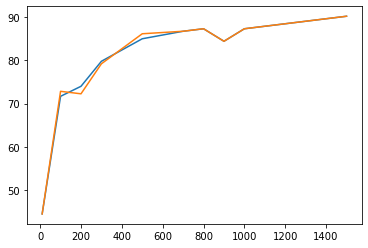

In [20]:
#Accuracy plot for ID3 vs Training Set size 

print("Unprunned ID3 DT accuracy with training set size")
plt.plot(num,unprunned_acc_plot)

print()
print("Prunned ID3 DT accuracy with training set size")
plt.plot(num,prunned_acc_plot)



Unprunned Gini Impurity DT accuracy with training set size

Prunned Gini Impurity DT accuracy with training set size


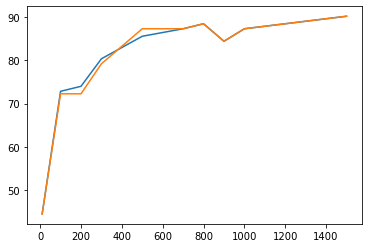

In [21]:
#Accuracy Plot for gini Impurity vs Training set size

print("Unprunned Gini Impurity DT accuracy with training set size")
plt.plot(num,unprunned_acc_gini_plot)

print()
print("Prunned Gini Impurity DT accuracy with training set size")
plt.plot(num,prunned_acc_gini_plot)

In [18]:
#Gini, ID3 Accuracy Results With and Without Pruning

prune_gini=DecisionTree('gini')
prune_gini.fit(X_train1,Y_train1,4)
print('\nWithout Prunning')
print('Training Accuracy:',prune_gini.cal_accuracy(train_x,train_y))
print('Testing Accuracy:',prune_gini.cal_accuracy(test_x,test_y))
print('Validation Accuracy',prune_gini.cal_accuracy(X_valid,Y_valid))
print('\nWith Prunning')
prune(prune_gini,X_valid,Y_valid,prune_gini.parent_node)

print('Training Accuracy:',prune_gini.cal_accuracy(train_x,train_y))
print('Testing Accuracy:',prune_gini.cal_accuracy(test_x,test_y))
print('Valididation Accuracy',prune_gini.cal_accuracy(X_valid,Y_valid))

prune_info=DecisionTree('info')
prune_info.fit(X_train1,Y_train1,4)
print('\nWith Prunning')
prune(prune_info,X_valid,Y_valid,prune_info.parent_node)

print('Training Accuracy:',prune_info.cal_accuracy(train_x,train_y))
print('Testing Accuracy:',prune_info.cal_accuracy(test_x,test_y))
print('Validation Accuracy',prune_info.cal_accuracy(X_valid,Y_valid))



Without Prunning
Training Accuracy: 99.35691318327974
Testing Accuracy: 90.17341040462428
Validation Accuracy 93.58974358974359

With Prunning
Training Accuracy: 98.45659163987138
Testing Accuracy: 89.01734104046243
Valididation Accuracy 96.7948717948718

With Prunning
Training Accuracy: 98.45659163987138
Testing Accuracy: 89.01734104046243
Validation Accuracy 96.7948717948718


In [22]:
#classification report with and without pruning
from sklearn.metrics import classification_report
print("Unpruned DT Classification Report for gini")
print()
y_true = []
for i in test_y[0]:
  y_true.append(i)

y_pred = gini_dt.predict(test_x)

target_names = ['bad','good','ok','vgood']
print(classification_report(y_true, y_pred, target_names = target_names)) 

print("Unpruned DT classification Report for ID3")
print()
y_pred = infogain_dt.predict(test_x)

print(classification_report(y_true, y_pred, target_names = target_names)) 


print("pruned DT classification Report for gini")
print()
y_pred = prune_gini.predict(test_x)

print(classification_report(y_true, y_pred, target_names = target_names)) 

print("pruned DT classification Report for ID3")
print()
y_pred = prune_info.predict(test_x)

print(classification_report(y_true, y_pred, target_names = target_names))


Unpruned DT Classification Report for gini

              precision    recall  f1-score   support

         bad       0.96      0.97      0.97       112
        good       0.36      0.57      0.44         7
          ok       0.90      0.82      0.86        44
       vgood       0.89      0.80      0.84        10

    accuracy                           0.91       173
   macro avg       0.78      0.79      0.78       173
weighted avg       0.92      0.91      0.91       173

Unpruned DT classification Report for ID3

              precision    recall  f1-score   support

         bad       0.96      0.97      0.97       112
        good       0.36      0.57      0.44         7
          ok       0.90      0.82      0.86        44
       vgood       0.89      0.80      0.84        10

    accuracy                           0.91       173
   macro avg       0.78      0.79      0.78       173
weighted avg       0.92      0.91      0.91       173

pruned DT classification Report for gini

 

In [23]:
#Printing Gini Dicision Tree After Pruning
prune_gini.print_DT()

parent ( safety ) -->high low med 
high ( persons ) -->2 4 more 
2 ( None ) --> 0
4 ( buying ) -->1 2 3 4 5 6 
1 ( lug_boot ) -->big med small 
big ( None ) --> 3
med ( doors ) -->2 3 4 5more 
2 ( None ) --> 1
3 ( maintainence ) -->high low med 
high ( None ) --> 2
low ( None ) --> 1
med ( None ) --> 1
4 ( None ) --> 3
5more ( None ) --> 3
small ( maintainence ) -->high low med 
high ( None ) --> 2
low ( None ) --> 1
med ( None ) --> 1
2 ( maintainence ) -->high low vhigh 
high ( lug_boot ) -->big med small 
big ( None ) --> 3
med ( None ) --> 2
small ( None ) --> 2
low ( lug_boot ) -->big med small 
big ( None ) --> 3
med ( None ) --> 3
small ( None ) --> 1
vhigh ( None ) --> 2
3 ( maintainence ) -->high low med vhigh 
high ( None ) --> 2
low ( None ) --> 1
med ( lug_boot ) --> 3
vhigh ( None ) --> 2
4 ( maintainence ) -->high low med vhigh 
high ( None ) --> 2
low ( None ) --> 2
med ( None ) --> 2
vhigh ( None ) --> 0
5 ( None ) --> 2
6 ( maintainence ) -->high low med vhigh 
high ( 

In [24]:
#Printing ID3 dicision Tree After Pruning
prune_info.print_DT()

parent ( safety ) -->high low med 
high ( persons ) -->2 4 more 
2 ( None ) --> 0
4 ( buying ) -->1 2 3 4 5 6 
1 ( lug_boot ) -->big med small 
big ( None ) --> 3
med ( doors ) -->2 3 4 5more 
2 ( None ) --> 1
3 ( maintainence ) -->high low med 
high ( None ) --> 2
low ( None ) --> 1
med ( None ) --> 1
4 ( None ) --> 3
5more ( None ) --> 3
small ( maintainence ) -->high low med 
high ( None ) --> 2
low ( None ) --> 1
med ( None ) --> 1
2 ( maintainence ) -->high low vhigh 
high ( lug_boot ) -->big med small 
big ( None ) --> 3
med ( None ) --> 2
small ( None ) --> 2
low ( lug_boot ) -->big med small 
big ( None ) --> 3
med ( None ) --> 3
small ( None ) --> 1
vhigh ( None ) --> 2
3 ( maintainence ) -->high low med vhigh 
high ( None ) --> 2
low ( None ) --> 1
med ( lug_boot ) --> 3
vhigh ( None ) --> 2
4 ( maintainence ) -->high low med vhigh 
high ( None ) --> 2
low ( None ) --> 2
med ( None ) --> 2
vhigh ( None ) --> 0
5 ( None ) --> 2
6 ( maintainence ) -->high low med vhigh 
high ( 